# Modelo red neuronal mas simple

In [61]:
from importacion_preprocesado import download_and_load_data, preprocesamiento


tamany_img = (128,128) # tamaño reducido para colab porque si no supera la ram
X, y = download_and_load_data(target_size=tamany_img)

X_train, X_val, X_test, y_train, y_val, y_test = preprocesamiento(X, y)

Dataset ya existe, solo se van a cargar las imágenes.
X shape: (4217, 128, 128, 3) y shape: (4217,)


In [62]:
# Importar la función
from models.simple_cnn import create_model

# Crear el modelo
model = create_model(input_shape=(128,128,3), num_classes=4)

c:\Users\roger\miniconda3\envs\dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)

hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5476 - loss: 2.4971 - val_accuracy: 0.6789 - val_loss: 0.7296
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7082 - loss: 0.6799 - val_accuracy: 0.7287 - val_loss: 0.6205
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7529 - loss: 0.5842 - val_accuracy: 0.7464 - val_loss: 0.5877
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7809 - loss: 0.5282 - val_accuracy: 0.7370 - val_loss: 0.6370
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7608 - loss: 0.5779 - val_accuracy: 0.7773 - val_loss: 0.5445
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8118 - loss: 0.4686 - val_accuracy: 0.7571 - val_loss: 0.5593
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8090 - loss: 0.4672 - val_accuracy: 0.7524 - val_loss: 0.5898
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7952 - loss: 0.5001 - val_accuracy: 0.7678 - v

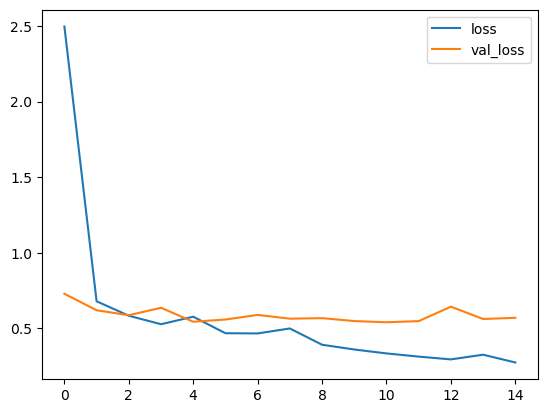

In [64]:
import matplotlib.pyplot as plt
# Visualize loss evolution during training
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

datasets = {
    "Train": (X_train, y_train),
    "Val": (X_val, y_val),
    "Test": (X_test, y_test)
}

def evaluate(model, X, y):
    #Convertir a enteros
    y_true = np.argmax(y, axis=1)

    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    return acc, f1


def crear_df_metricas(model, datasets):
    results = {}
    for split_name, (X, y) in datasets.items():
        acc, f1 = evaluate(model, X, y)
        results[split_name] = [acc, f1]
    
    df = pd.DataFrame(results, index=["Accuracy", "F1"])
    return df

df = crear_df_metricas(model, datasets)
df


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,Train,Val,Test
Accuracy,0.900751,0.793839,0.795024
F1,0.899136,0.790590,0.793601


In [67]:
def plot_barra(metrica, titulo, color):

    plt.figure(figsize=(6,4))
    bars = plt.bar(metrica.index, metrica.values, color=color)
    plt.bar_label(bars)
    plt.title(f"{titulo}: Train vs Validation vs Test")
    plt.ylabel(titulo)
    plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--')
    plt.show()


def plots_metricas(df):
    #Extraemos la fila
    accuracy = df.loc["Accuracy"]
    f1 = df.loc["F1"]

    #Grafico de Accuracy
    plot_barra(accuracy, titulo = "Accuracy", color="blue")

    #Grafico de 
    plot_barra(f1, titulo ="F1", color = "red")

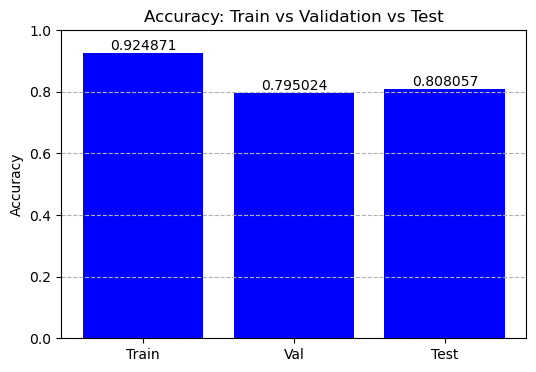

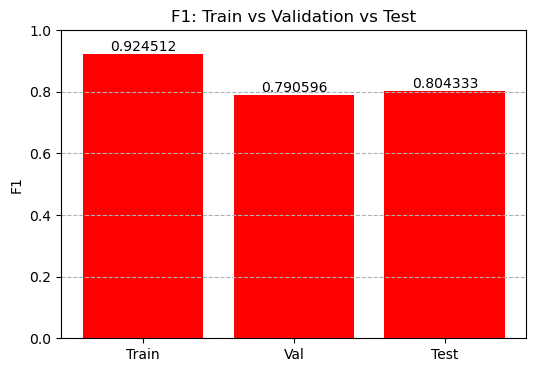

In [ ]:
plots_metricas(df)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


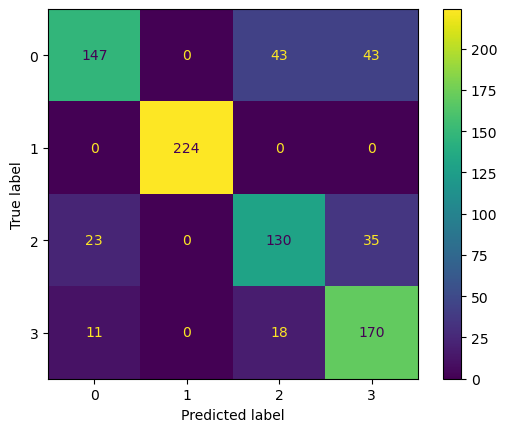

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()